In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


CREAMOS GRAFICO DE DENSIDAD

<Axes: xlabel='bill_depth_mm', ylabel='Density'>

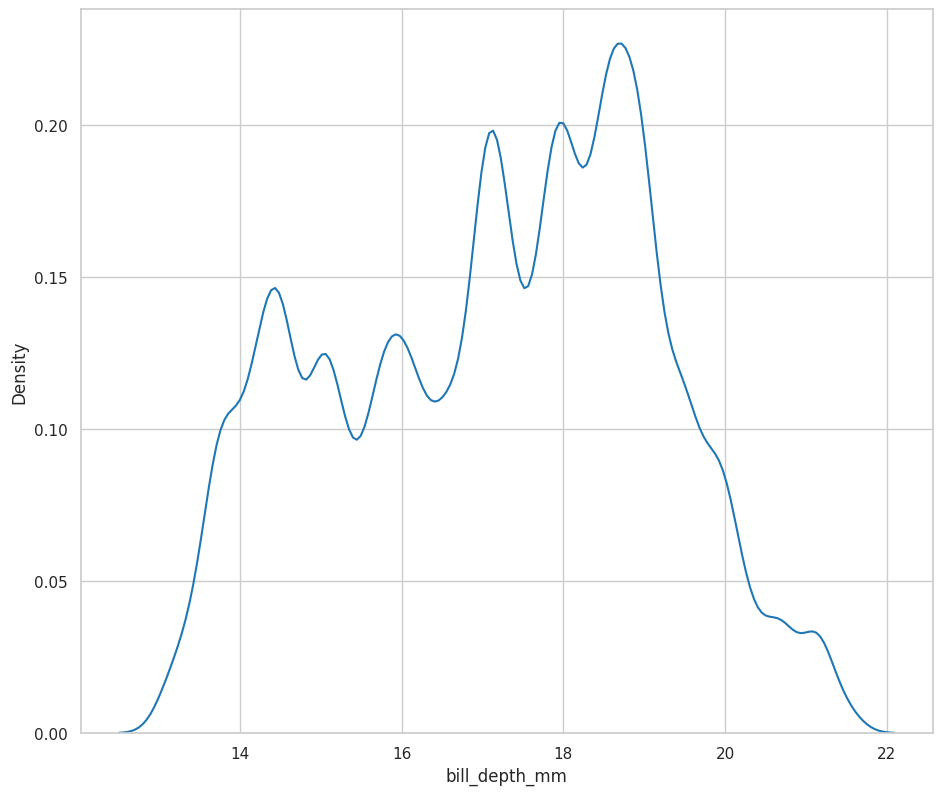

In [3]:
sns.kdeplot(
    data=penguins_df,
    x='bill_depth_mm',
    bw_method=0.1
)

VARIABLE - BODY-MASS-G - DISTRIBUCIÓN NORMAL

In [5]:
stats = penguins_df.body_mass_g.describe()

In [6]:
stats

,body_mass_g
count,342.000000
mean,4201.754386
std,801.954536
min,2700.000000
25%,3550.000000
50%,4050.000000
75%,4750.000000
max,6300.000000


In [15]:
!pip install scipy
!pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.4-py3-none-any.whl size=12265 sha256=ec9d74e0040416cc065236ef6d421bf6668feb71e91cbe2fa2dff2319a001509
  Stored in directory: /root/.cache/pip/wheels/76/f5/3d/0b1dbbfc3b9d89c408cdefe108ab25e0bb32afacb83dfebdbd
Successfully built empiricaldist


In [16]:
import scipy
import empiricaldist

In [9]:
xs = np.linspace(stats['min'],stats['max'])
xs

array([2700.        , 2773.46938776, 2846.93877551, 2920.40816327,
       2993.87755102, 3067.34693878, 3140.81632653, 3214.28571429,
       3287.75510204, 3361.2244898 , 3434.69387755, 3508.16326531,
       3581.63265306, 3655.10204082, 3728.57142857, 3802.04081633,
       3875.51020408, 3948.97959184, 4022.44897959, 4095.91836735,
       4169.3877551 , 4242.85714286, 4316.32653061, 4389.79591837,
       4463.26530612, 4536.73469388, 4610.20408163, 4683.67346939,
       4757.14285714, 4830.6122449 , 4904.08163265, 4977.55102041,
       5051.02040816, 5124.48979592, 5197.95918367, 5271.42857143,
       5344.89795918, 5418.36734694, 5491.83673469, 5565.30612245,
       5638.7755102 , 5712.24489796, 5785.71428571, 5859.18367347,
       5932.65306122, 6006.12244898, 6079.59183673, 6153.06122449,
       6226.53061224, 6300.        ])

In [13]:
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)

<Axes: xlabel='body_mass_g'>

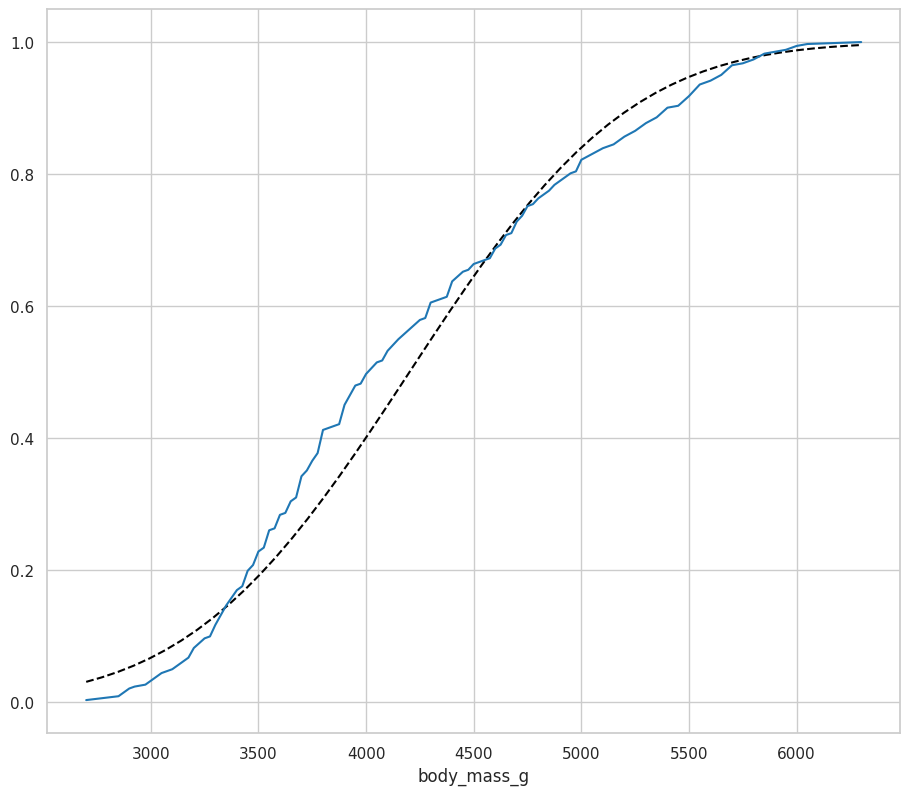

In [18]:
plt.plot(xs,ys,color='black',linestyle='dashed')

empiricaldist.Cdf.from_seq(
    penguins_df.body_mass_g,
    normalize=True
).plot()

GRAFICO DE DENSIDAD DE DISTRIBUCIÓN NORMAL VS DISTRIBUCIÓN PDF

<Axes: xlabel='body_mass_g', ylabel='Density'>

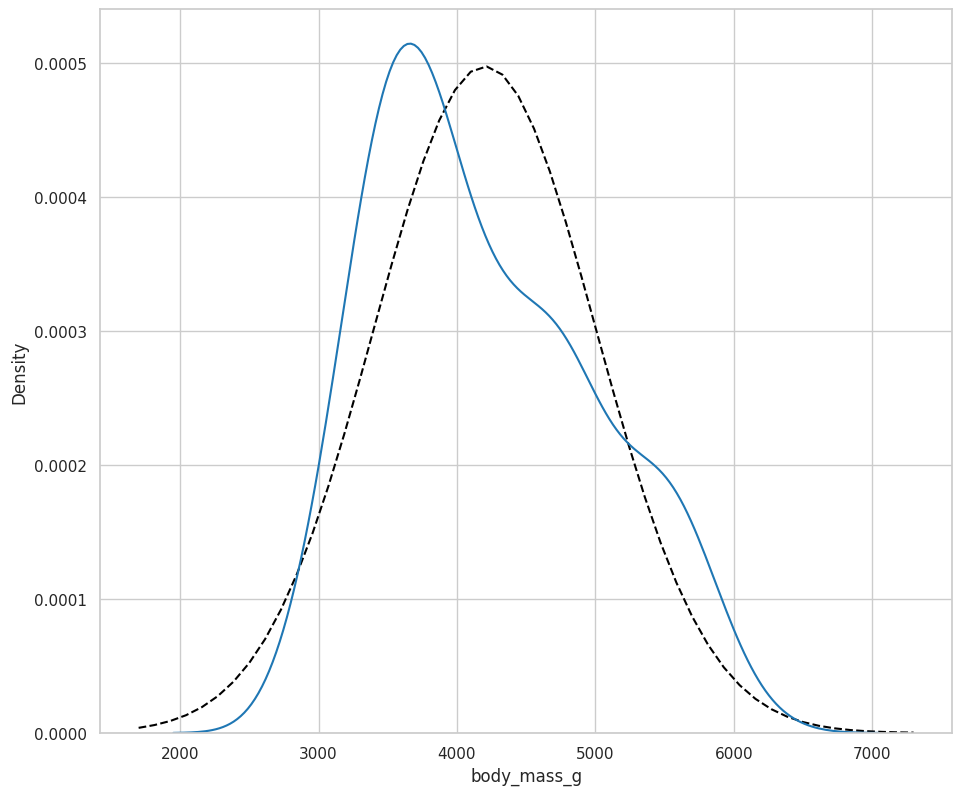

In [20]:
xs = np.linspace(stats['min']-1000,stats['max']+1000)
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)
plt.plot(xs,ys,color='black',linestyle='dashed')

sns.kdeplot(
    data=penguins_df,
    x='body_mass_g'
)